# Exercise 2: Decision Trees

In this assignment you will implement a Decision Tree algorithm as learned in class.

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. Submission includes this notebook only with the exercise number and your ID as the filename. For example: `hw2_123456789_987654321.ipynb` if you submitted in pairs and `hw2_123456789.ipynb` if you submitted the exercise alone.
1. Write **efficient vectorized** code whenever possible. Some calculations in this exercise take several minutes when implemented efficiently, and might take much longer otherwise. Unnecessary loops will result in point deduction.
1. You are responsible for the correctness of your code and should add as many tests as you see fit. Tests will not be graded nor checked.
1. Write your functions in this notebook only. **Do not create Python modules and import them**.
1. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) only. **Do not import anything else.**
1. Your code must run without errors. Make sure your `numpy` version is at least 1.15.4 and that you are using at least python 3.6. Changes of the configuration we provided are at your own risk. Any code that cannot run will not be graded.
1. Write your own code. Cheating will not be tolerated.
1. Answers to qualitative questions should be written in **markdown** cells (with $\LaTeX$ support). Answers that will be written in commented code blocks will not be checked.

## In this exercise you will perform the following:
1. Practice OOP in python.
2. Implement two impurity measures: Gini and Entropy.
3. Construct a decision tree algorithm.
4. Prune the tree to achieve better results.
5. Visualize your results.

# I have read and understood the instructions: *** 318195278, 302278601 ***

In [282]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Warmup - OOP in python

Our desicion tree will be implemented using a dedicated python class. Python classes are very similar to classes in Java.


You can use the following [site](https://jeffknupp.com/blog/2014/06/18/improve-your-python-python-classes-and-object-oriented-programming/) to learn about classes in python.

In [283]:
class Node(object):
    def __init__(self, data):
        self.data = data
        self.children = []

    def add_child(self, node):
        self.children.append(node)


In [284]:
n = Node(5)
p = Node(6)
q = Node(7)
n.add_child(p)
n.add_child(q)
n.children

[<__main__.Node at 0x7f9dd172e280>, <__main__.Node at 0x7f9dc6962400>]

## Data preprocessing

For the following exercise, we will use a dataset containing mushroom data `agaricus-lepiota.csv`. 

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family. Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous
one (=there are only two classes **edible** and **poisonous**). 
    
The dataset contains 8124 observations with 22 features:
1. cap-shape: bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
4. bruises: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

First, we will read and explore the data using pandas and the `.read_csv` method. Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

In [285]:
# load dataset
data = pd.read_csv('agaricus-lepiota.csv')

One of the advantages of the Decision Tree algorithm is that almost no preprocessing is required. However, finding missing values is always required.

In [286]:
#############################################################################
# TODO: Find columns with missing values and remove them from the data.#
#############################################################################

data = data.dropna()


#all_features = data.drop([])
#features_to_drop = []
#vals = all_features.values
#key = all_features.keys()
#for i in range(len(vals[0])):
#  for j in range(len(vals)):
#    if pd.isnull(vals[j][i]):
#      features_to_drop.append(key[i])
#      print(features_to_drop)
#all_features = all_features.drop(columns = list(set(features_to_drop)))

pass
#############################################################################
#                             END OF YOUR CODE                              #
#############################################################################

We will split the dataset to `Training` and `Testing` datasets.

In [287]:
from sklearn.model_selection import train_test_split
# Making sure the last column will hold the labels
X, y = data.drop('class', axis=1), data['class']
X = np.column_stack([X,y])
# split dataset using random_state to get the same split each time
X_train, X_test = train_test_split(X, random_state=99)

print("Training dataset shape: ", X_train.shape)
print("Testing dataset shape: ", X_test.shape)

Training dataset shape:  (6093, 22)
Testing dataset shape:  (2031, 22)


In [288]:
#also printed yshape...
y.shape

(8124,)

## Impurity Measures

Impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. Implement the functions `calc_gini` and `calc_entropy`. You are encouraged to test your implementation (10 points).

In [289]:
def calc_gini(data):
    """
    Calculate gini impurity measure of a dataset.
 
    Input:
    - data: any dataset where the last column holds the labels.
 
    Returns the gini impurity.    
    """
    gini = 0.0
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    if data.ndim == 1: return 0   
    size_S = data.shape[0]
    size_Se = 0
    size_Sp = 0
    for i in range(size_S):
      if data[i][data.shape[1] - 1] == 'e':
        size_Se = size_Se + 1
      else:
        size_Sp = size_Sp + 1
    gini = 1 - (size_Se/size_S)**2 - (size_Sp/size_S)**2   
    pass
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return gini

In [290]:
def calc_entropy(data):
    """
    Calculate the entropy of a dataset.

    Input:
    - data: any dataset where the last column holds the labels.

    Returns the entropy of the dataset.    
    """
    entropy = 0.0
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    if data.ndim == 1: return 0
    size_S = data.shape[0]
    size_Se = 0
    size_Sp = 0
    for i in range(size_S):
      if data[i][data.shape[1] - 1] == 'e':
        size_Se = size_Se + 1
      else:
        size_Sp = size_Sp + 1
    if size_Se == 0 or size_Sp == 0:
      return 0
    else:
      rlogr1 = (size_Se/size_S) * np.log2((size_Se/size_S))
      rlogr2 = (size_Sp/size_S) * np.log2((size_Sp/size_S))
      entropy = -1 * (rlogr1 + rlogr2)
      
    pass
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return entropy

In [291]:
##### Your Tests Here #####
calc_gini(X), calc_entropy(X)

(0.49956363223797745, 0.9993703627906085)

## Goodness of Split

Given a feature the Goodnees of Split measures the reduction in the impurity if we split the data according to the feature.
$$
\Delta\varphi(S, A) = \varphi(S) - \sum_{v\in Values(A)} \frac{|S_v|}{|S|}\varphi(S_v)
$$

In our implementation the goodness_of_split function will return either the Goodness of Split or the Gain Ratio as learned in class. You'll control the return value with the `gain_ratio` parameter. If this parameter will set to False (the default value) it will return the regular Goodness of Split. If it will set to True it will return the Gain Ratio.
$$
GainRatio(S,A)=\frac{InformationGain(S,A)}{SplitInformation(S,A)}
$$
Where:
$$
InformationGain(S,A)=Goodness\ of\ Split\ calculated\ with\ Entropy\ as\ the\ Impurity\ function \\
SplitInformation(S,A)=- \sum_{a\in A} \frac{|S_a|}{|S|}\log\frac{|S_a|}{|S|}
$$
NOTE: you can add more parameters to the function and you can also add more returning variables (The given parameters and the given returning variable should not be touch). (10 Points)

In [292]:
from numpy.ma.core import log2
def goodness_of_split(data, feature, impurity_func, gain_ratio=False):
    """
    Calculate the goodness of split of a dataset given a feature and impurity function.

    Input:
    - data: any dataset where the last column holds the labels.
    - feature: the feature index.
    - impurity func: a function that calculates the impurity.
    - gain_ratio: goodness of split or gain ratio flag.

    Returns the goodness of split (or the Gain Ration).  
    """
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    #if not gain_ratio:
    phi_S = impurity_func(data)
    a_Vals = {}
    for i in range(data.shape[0]):
       v = data[i][feature]
       a_Vals[v] = np.ones(data.shape[1])
    
    for i in range(data.shape[0]):
       v = data[i][feature]
       a_Vals[v] = np.vstack((a_Vals[v],data[i]))
      
    for key in a_Vals:
      a_Vals[key] = np.delete(a_Vals[key],0,0)
    
    sum = 0
    if not gain_ratio:
      for key in a_Vals:
        phi_Sv = impurity_func(a_Vals[key])
        ratio = a_Vals[key].shape[0]/data.shape[0]
        sum += (phi_Sv * ratio)
      goodness = phi_S - sum
    
    else:
      information_gain = goodness_of_split(data,feature,calc_entropy,False)
      split_information = 0
      for key in a_Vals:
        ratio = a_Vals[key].shape[0]/data.shape[0]
        rlogr = ratio * np.log2(ratio)
        sum += rlogr
      split_information = -1 * sum
      goodness = information_gain / split_information


    pass
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return goodness

In [293]:
#checking goodness of split
print(goodness_of_split(X_train,5,calc_gini,False))
print(goodness_of_split(X_train,5,calc_entropy,False))
print(goodness_of_split(X_train,5,calc_entropy,True))

0.005096002067692007
0.008055978176283451
0.04664750054664303


## Building a Decision Tree

Use a Python class to construct the decision tree. Your class should support the following functionality:

1. Initiating a node for a decision tree. You will need to use several class methods and class attributes and you are free to use them as you see fit. We recommend that every node will hold the feature and value used for the split and its children.
2. Your code should support both Gini and Entropy as impurity measures. 
3. The provided data includes categorical data. In this exercise, when splitting a node create the number of children needed according to the attribute unique values.

Complete the class `DecisionNode`. The structure of this class is entirely up to you. 

Complete the function `build_tree`. This function should get the training dataset and the impurity as inputs, initiate a root for the decision tree and construct the tree according to the procedure you learned in class. (30 points)

In [294]:
from math import nan
class DecisionNode:
    """
    This class will hold everything you require to construct a decision tree.
    The structure of this class is up to you. However, you need to support basic 
    functionality as described above. It is highly recommended that you 
    first read and understand the entire exercise before diving into this class.
    """
    def __init__(self, feature, val, data):
        self.feature = feature # column index of criteria being tested
        self.val = val
        self.children = []
        self.depth = 0
        self.data = data
        self.parent = None
        
    def size(self):
        return self.data.shape[0]

    def isPure(self, blacklist):  #note that blacklist is here for commented version (iterative)
      return calc_entropy(self.data) == 0

      """in this version train is not 1.0 (is 0.9998735 blah blah) check if features makes better goodness                         
      for i in range(self.data.shape[1]-1):
        if i not in blacklist:
          if not goodness_of_split(self.data, i,calc_entropy) == 0:
            return False
      return True
      """
    def add_child(self, node):
        self.children.append(node)
        node.parent = self
        node.depth = self.depth + 1

    def printInfo(self):
      print(f"my value is {self.val}")
      print(f"my children are {self.children}")
      if len(self.children) > 0:
        print(f"my first childs depth is {self.children[0].depth}")
      print(f"my depth is {self.depth}")

    def find_best_split(self, impurity_func, gr, blacklist):
      super_good = -1
      good_i = -1
      for i in range(self.data.shape[1]-1):
        temp = goodness_of_split(self.data, i, impurity_func, gr)
        if temp > super_good and i not in blacklist:
          super_good = temp
          good_i = i
      return good_i

    def find_root(self):
      #if self.parent == None: return self
      #else: self.parent.find_root()
      iter = self
      while not iter.parent == None:
        iter = iter.parent
      return iter

    def find_branches(self, feature):
      ret = set()
      for i in range(self.data.shape[0]):
        ret.add(self.data[i][feature])
      return ret

    def pred(self):
      pcount = 0
      ecount = 0
      for label in self.data.T[-1]:
        if label == 'p': pcount += 1
        else: ecount += 1
      if ecount > pcount: return 'e'
      else: return 'p'
        
    def count_p(self):
        pcount = 0
        for label in self.data.T[-1]:
            if label == 'p': pcount += 1
        return pcount


In [295]:
def build_tree(data, impurity, gain_ratio=False, min_samples_split=1, max_depth=1000):
    """
    Build a tree using the given impurity measure and training dataset. 
    You are required to fully grow the tree until all leaves are pure. 

    Input:
    - data: the training dataset.
    - impurity: the chosen impurity measure. Notice that you can send a function
      as an argument in python.
    - gain_ratio: goodness of split or gain ratio flag
    - min_samples_split: the minimum number of samples required to split an internal node
    - max_depth: the allowable depth of the tree
    
    Output: the root node of the tree.
    """
    root = None
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    root = DecisionNode(None, None, data)
    blacklist = []
    def build_tree_recursive(root, data, impurity, blacklist, gain_ratio, min_samples_split, max_depth):
      
      blacklist = blacklist.copy()
      #note sending blacklist for iterative version of isPure() which isnt used in this version
      if (root.isPure(blacklist) or root.depth >= max_depth or root.size() <= min_samples_split): return None

      else:
        best_split = root.find_best_split(impurity,gain_ratio, blacklist)
        if not best_split == -1:        
          branches = root.find_branches(best_split)
          blacklist.append(best_split)
        else: return None

        for val in branches:
          branch = DecisionNode(best_split, val, np.ones(data.shape[1]))
          root.add_child(branch)

        for instance in root.data:
          for i in range(len(root.children)):
            if instance[best_split] == root.children[i].val:
              root.children[i].data = np.vstack((root.children[i].data, instance))
 
        for child in root.children:
          child.data = np.delete(child.data,0,0)


        for child in root.children:
          build_tree_recursive(child, child.data, impurity, blacklist, gain_ratio, min_samples_split, max_depth)


    build_tree_recursive(root, data, impurity, blacklist, gain_ratio, min_samples_split, max_depth)
    
    pass
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return root.find_root()

In [296]:
# python supports passing a function as an argument to another function.
tree_gini = build_tree(data=X_train, impurity=calc_gini) # gini and goodness of split
tree_entropy = build_tree(data=X_train, impurity=calc_entropy) # entropy and goodness of split
tree_entropy_gain_ratio = build_tree(data=X_train, impurity=calc_entropy, gain_ratio=True) # entropy and gain ratio

## Tree evaluation

Complete the functions `predict` and `calc_accuracy`. (10 points)

In [297]:
def predict(node, instance):
    """
    Predict a given instance using the decision tree
 
    Input:
    - root: the root of the decision tree.
    - instance: an row vector from the dataset. Note that the last element 
                of this vector is the label of the instance.
 
    Output: the prediction of the instance.
    """
    pred = None
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    
    while not len(node.children) == 0:
      i = 0
      for child in node.children:
        if child.val == instance[child.feature]:
          node = child
          i = i + 1
          break
      if i == 0:
        break


    pass
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return node.pred()

In [298]:
def calc_accuracy(node, dataset):
    """
    Predict a given dataset using the decision tree
 
    Input:
    - node: a node in the decision tree.
    - dataset: the dataset on which the accuracy is evaluated
 
    Output: the accuracy of the decision tree on the given dataset (%).
    """
    accuracy = 0
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    i = 0
    percent = 0
    for instance in dataset:
      if predict(node,instance) == dataset[i][-1]:
        percent += 1
      i += 1
    accuracy = percent / i
    pass
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return accuracy 

After building the three trees using the training set, you should calculate the accuracy on the test set. For each tree print the training and test accuracy. Select the tree that gave you the best test accuracy. For the rest of the exercise, use that tree (when you asked to build another tree use the same impurity function and same gain_ratio flag). 

In [299]:
#### Your code here ####
train_accuracy_entropy = calc_accuracy(tree_entropy, X_train)
test_accuracy_entropy = calc_accuracy(tree_entropy, X_test)
train_accuracy_gini = calc_accuracy(tree_gini, X_train)
test_accuracy_gini = calc_accuracy(tree_gini, X_test)
train_accuracy_gain = calc_accuracy(tree_entropy_gain_ratio, X_train)
test_accuracy_gain = calc_accuracy(tree_entropy_gain_ratio, X_test)

print(f"train accuracy for entropy is : {train_accuracy_entropy}")
print(f"test accuracy for entropy is : {test_accuracy_entropy}")
print(f"train accuracy for gini is : {train_accuracy_gini}")
print(f"test accuracy for gini is : {test_accuracy_gini}")
print(f"train accuracy for gain is : {train_accuracy_gain}")
print(f"test accuracy for gain is : {test_accuracy_gain}")


train accuracy for entropy is : 1.0
test accuracy for entropy is : 0.7804037419990153
train accuracy for gini is : 1.0
test accuracy for gini is : 0.7749876907927129
train accuracy for gain is : 1.0
test accuracy for gain is : 0.7902511078286558


## Depth pruning

(15 points)

Consider the following max_depth values: [1, 2, 3, 4, 5, 6, 7, 8]. For each value, construct a tree and prune it according to the max_depth value = don't let the tree to grow beyond this depth. Next, calculate the training and testing accuracy.<br>
On a single plot, draw the training and testing accuracy as a function of the max_depth. Mark the best result on the graph with red circle.

max_depth : 1, accuracy of train : 0.8885606433612342
max_depth : 1, accuracy of test : 0.8852781880846874
max_depth : 2, accuracy of train : 0.8885606433612342
max_depth : 2, accuracy of test : 0.8852781880846874
max_depth : 3, accuracy of train : 0.8964385360249466
max_depth : 3, accuracy of test : 0.8931560807483998
max_depth : 4, accuracy of train : 0.901854587231249
max_depth : 4, accuracy of test : 0.8956179222058099
max_depth : 5, accuracy of train : 0.9030034465780403
max_depth : 5, accuracy of test : 0.8872476612506155
max_depth : 6, accuracy of train : 0.9069423929098966
max_depth : 6, accuracy of test : 0.8778926637124569
max_depth : 7, accuracy of train : 0.9184309863778106
max_depth : 7, accuracy of test : 0.8586903003446578
max_depth : 8, accuracy of train : 0.9328737895946168
max_depth : 8, accuracy of test : 0.8399803052683407


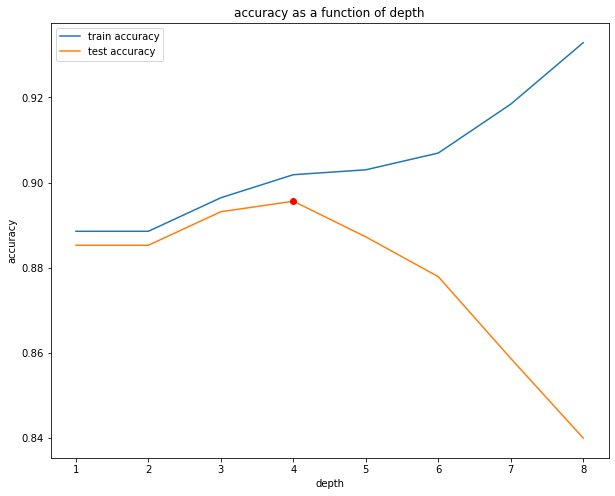

In [300]:
#### Your code here ####


treesd = []
for i in range(8):
  treesd.append(build_tree(data=X_train, impurity=calc_entropy, gain_ratio=True, min_samples_split=1, max_depth = i + 1))

train_accuracy_depth = []
test_accuracy_depth = []
for i in range(8):
  print(f"max_depth : {i+1}, accuracy of train : {calc_accuracy(treesd[i], X_train)}")
  train_accuracy_depth.append(calc_accuracy(treesd[i], X_train))
  print(f"max_depth : {i+1}, accuracy of test : {calc_accuracy(treesd[i], X_test)}")
  test_accuracy_depth.append(calc_accuracy(treesd[i], X_test))


best_max_depth = 0
best_max_depth_val = 0

for i in range(len(test_accuracy_depth)):
  if test_accuracy_depth[i] > best_max_depth_val:
    best_max_depth_val = test_accuracy_depth[i]
    best_max_depth = i

plt.plot(np.arange(start=1, stop=len(train_accuracy_depth)+1, step=1),train_accuracy_depth)
plt.plot(np.arange(start=1, stop=len(train_accuracy_depth)+1, step=1),test_accuracy_depth)
plt.plot(best_max_depth + 1,test_accuracy_depth[best_max_depth],'ro')
plt.legend(['train accuracy','test accuracy'])
plt.xscale('linear')
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.title('accuracy as a function of depth')
plt.show()

## Min Samples Split

(15 points)

Consider the following min_samples_split values: [1, 5, 10, 20, 50]. For each value, construct a tree and prune it according to the min_samples_split value = don't split a node if the number of sample in it is less or equal to the min_samples_split value. Next, calculate the training and testing accuracy.<br>
On a single plot, draw the training and testing accuracy as a function of the min_samples_split. Mark the best result on the graph with red circle. (make sure that the x-axis ticks represent the values of min_samples_split)

min sample split is : 1, accuracy of train : 1.0
min sample split_is : 1, accuracy of test : 0.7902511078286558
min sample split is : 5, accuracy of train : 0.9182668636139832
min sample split_is : 5, accuracy of test : 0.8321024126046282
min sample split is : 10, accuracy of train : 0.9041523059248318
min sample split_is : 10, accuracy of test : 0.8778926637124569
min sample split is : 20, accuracy of train : 0.9020187099950763
min sample split_is : 20, accuracy of test : 0.8916789758739537
min sample split is : 50, accuracy of train : 0.9016904644674216
min sample split_is : 50, accuracy of test : 0.8951255539143279


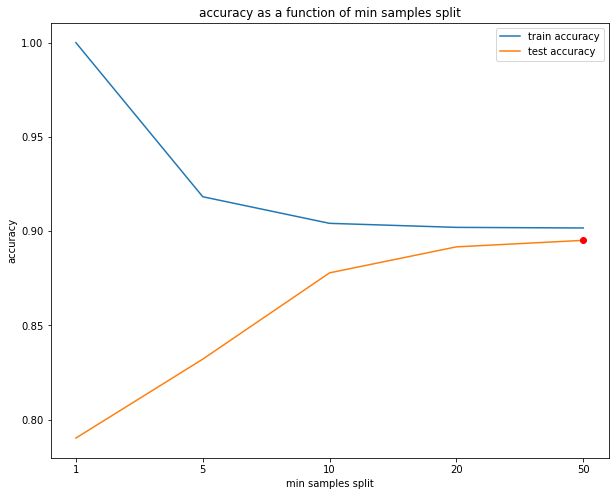

In [301]:
#### Your code here ####

min_split_values = [1,5,10,20,50]
treesm = []
for i in range(len(min_split_values)):
    treesm.append(build_tree(data=X_train, impurity=calc_entropy, gain_ratio=True, min_samples_split=min_split_values[i], max_depth=1000))

train_accuracy_samples = []
test_accuracy_samples = []
for i in range(len(min_split_values)):
  print(f"min sample split is : {min_split_values[i]}, accuracy of train : {calc_accuracy(treesm[i], X_train)}")
  train_accuracy_samples.append(calc_accuracy(treesm[i], X_train))
  print(f"min sample split_is : {min_split_values[i]}, accuracy of test : {calc_accuracy(treesm[i], X_test)}")
  test_accuracy_samples.append(calc_accuracy(treesm[i], X_test))


best_min_samples = 0
best_min_samples_val = 0

for j in range(len(test_accuracy_samples)):
  if test_accuracy_samples[j] > best_min_samples_val:
    best_min_samples = j
    best_min_samples_val = test_accuracy_samples[j]


plt.plot(range(len(min_split_values)),train_accuracy_samples)
plt.plot(range(len(min_split_values)),test_accuracy_samples)
plt.plot(best_min_samples,best_min_samples_val,'ro')    
plt.xticks(range(len(min_split_values)),min_split_values)
plt.legend(['train accuracy','test accuracy'])
plt.xlabel('min samples split')
plt.ylabel('accuracy')
plt.title('accuracy as a function of min samples split')

plt.show()

Build the best 2 trees:
1. tree_max_depth - the best tree according to max_depth pruning
1. tree_min_samples_split - the best tree according to min_samples_split pruning

In [302]:
#### Your code here ####
tree_max_depth = treesd[best_max_depth]
tree_min_samples_split = treesm[j]

## Number of Nodes

(5 points)

Complete the function counts_nodes and print the number of nodes in each tree and print the number of nodes of the two trees above

In [303]:
def count_nodes(node):
    """
    Count the number of node in a given tree

    Input:
    - node: a node in the decision tree.
 
    Output: the number of node in the tree.
    """
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    def count_nodes_rec(node):
      i = 0
      if len(node.children) == 0:
        return i + 1
      else:
        i = i + 1                          
        for child in node.children:
          i += count_nodes_rec(child)
        return i
        
    i = count_nodes_rec(node)
    pass
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return i

In [304]:
print(f"The number of nodes in best max depth tree is : {count_nodes(tree_max_depth)}")
print(f"The number of nodes in best min samples split tree is : {count_nodes(tree_min_samples_split)}")

The number of nodes in best max depth tree is : 205
The number of nodes in best min samples split tree is : 349


## Print the tree

Complete the function `print_tree`. Your tree should be visualized clearly. You can use the following example as a reference:
```
[ROOT, feature=X0],
  [X0=a, feature=X2]
    [X2=c, leaf]: [{1.0: 10}]
    [X2=d, leaf]: [{0.0: 10}]
  [X0=y, feature=X5], 
    [X5=a, leaf]: [{1.0: 5}]
    [X5=s, leaf]: [{0.0: 10}]
  [X0=e, leaf]: [{0.0: 25, 1.0: 50}]
```
In each brackets:
* The first argument is the parent feature with the value that led to current node
* The second argument is the selected feature of the current node
* If the current node is a leaf, you need to print also the labels and their counts

(5 points)

In [305]:
# you can change the function signeture
def print_tree(node, depth=0, parent_feature='ROOT', feature_val='ROOT'):
    '''
    prints the tree according to the example above

    Input:
    - node: a node in the decision tree

    This function has no return value
    '''
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    
    if node.parent == None:
        print(f"[{parent_feature}, feature = {node.children[0].feature}]")
    else:
        if not len(node.children) == 0:
            print(f"  [{node.feature} = {node.val}, feature = {node.children[0].feature}]")
        else:
            countp = node.count_p()
            counte = node.size() - node.count_p()
            print(f"    [{parent_feature} = {node.val}, leaf]: [p: {countp}, e: {counte}]")
    for child in node.children:
        print_tree(child,0, node.children[0].feature, child.val)
    
    pass
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################

print the tree with the best test accuracy and with less than 50 nodes (from the two pruning methods)

In [306]:
#### Your code here ####
root = None
best_curr_acc = 0
for tree in treesd:
    if count_nodes(tree) < 50:
        if best_curr_acc <= calc_accuracy(tree, X_test):
            best_curr_acc = calc_accuracy(tree, X_test)
            root = tree
for tree in treesm:
    if count_nodes(tree) < 50:
        if best_curr_acc <= calc_accuracy(tree, X_test):
            best_curr_acc = calc_accuracy(tree, X_test)
            root = tree

print_tree(root)

[ROOT, feature = 4]
  [4 = y, feature = 1]
    [1 = y, leaf]: [p: 188, e: 31]
    [1 = s, leaf]: [p: 194, e: 18]
  [4 = m, feature = 0]
    [0 = f, leaf]: [p: 8, e: 1]
    [0 = x, leaf]: [p: 7, e: 0]
    [0 = k, leaf]: [p: 10, e: 1]
  [4 = a, feature = 2]
    [2 = n, leaf]: [p: 5, e: 33]
    [2 = y, leaf]: [p: 19, e: 133]
    [2 = w, leaf]: [p: 7, e: 107]
  [4 = f, feature = 10]
    [10 = f, leaf]: [p: 91, e: 14]
    [10 = s, leaf]: [p: 310, e: 22]
    [10 = k, leaf]: [p: 1037, e: 134]
  [4 = l, feature = 1]
    [1 = y, leaf]: [p: 10, e: 159]
    [1 = f, leaf]: [p: 1, e: 19]
    [1 = s, leaf]: [p: 16, e: 94]
  [4 = s, feature = 13]
    [13 = p, leaf]: [p: 190, e: 12]
    [13 = w, leaf]: [p: 190, e: 26]
  [4 = c, feature = 6]
    [6 = w, leaf]: [p: 74, e: 3]
    [6 = c, leaf]: [p: 63, e: 7]
  [4 = n, feature = 7]
    [7 = n, leaf]: [p: 58, e: 135]
    [7 = b, leaf]: [p: 286, e: 2197]
  [4 = p, feature = 0]
    [0 = f, leaf]: [p: 86, e: 7]
    [0 = x, leaf]: [p: 89, e: 1]
